<a href="https://colab.research.google.com/github/Cho-mindong/study_ai_pre-cousre/blob/master/%EC%82%AC%EB%B6%84%EC%9C%84%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사분위수 # 치킨집 A사와 B사의 배달시간 데이터("분"단위)

In [0]:
import pandas as pd

In [0]:
store_a=pd.Series([20,21,23,22,26,28,35,35,41,42,43,45,44,45,46,47,47,46,47,58,58,59,60,56,57,57,80])
store_b=pd.Series([5,6,11,13,15,16,20,20,21,23,22,27,27,30,30,32,36,37,37,40,40,43,44,51,54,70,600])


In [0]:
A_Q1=store_a.quantile(0.25)                  #quantile 매소드는 0~1 사이의 숫자로 해야함
print("1사분위수:", A_Q1)
A_Q2=store_a.quantile(0.50) 
print("2사분위수(중앙값):", A_Q2)
A_Q3=store_a.quantile(0.75) 
print("3사분위수:", A_Q3)
A_Q4=store_a.quantile(1) 
print("4사분위수:", A_Q4, "\n")

B_Q1=store_b.quantile(0.25) 
print("1사분위수:", B_Q1)
B_Q2=store_b.quantile(0.50) 
print("2사분위수(중앙값):", B_Q2)
B_Q3=store_b.quantile(0.75) 
print("3사분위수:", B_Q3)
B_Q4=store_b.quantile(1) 
print("4사분위수:", B_Q4)






1사분위수: 35.0
2사분위수(중앙값): 45.0
3사분위수: 56.5
4사분위수: 80.0 

1사분위수: 20.0
2사분위수: 30.0
3사분위수: 40.0
4사분위수: 600.0


In [0]:
import matplotlib.pyplot as plt


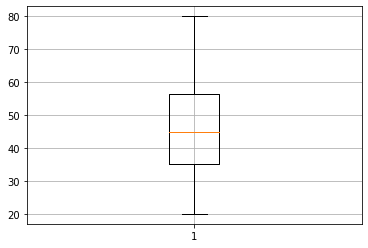

In [0]:
plt.boxplot((store_a))
plt.grid()
plt.show()

위 그림에서 붉은 선은 Q2(중앙값)

가운데에 있는 상자의 윗 선은 Q3 아랫선은 Q1


80부분에 굵은 선은 이상치를 제외한 최댓값.
20부분에 굵은 선은 이상치를 제외한 최솟값.

이 최댓값,최솟값을 벗어난 데이터는 이상치로 간주할 수 있어 자세하게 살펴봐야함




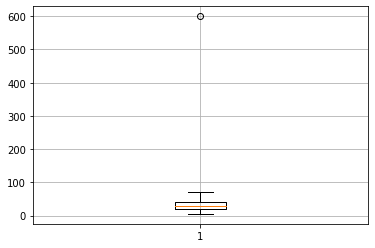

In [0]:
plt.boxplot((store_b))
plt.grid()
plt.show()

위 그림은 아래 쪽으로 치우쳐져 있다.
그 이유는 600이라는 데이터가 다른 데이터에 비해 압도적으로 크기때문이다. 

보는것과 같이 위쪽 굵은선에 벗어나 있으므로 600은 이상치라는 것을 알 수 있다.

600 데이터를 삭제해 보자.

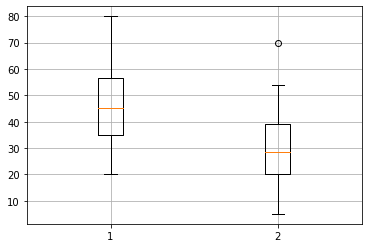

In [0]:
store_b=pd.Series([5,6,11,13,15,16,20,20,21,23,22,27,27,30,30,32,36,37,37,40,40,43,44,51,54,70])
plt.boxplot((store_a,store_b))
plt.grid()
plt.show()

1번은 A이고 2번은 B이다.

600을 지우니

B는 A처럼 깔끔하게 그려지는 것을 알 수 있다.

딱봐도 A가게의 배달시간이 B가게의 배달시간보다 길다는 것을 알 수 있다.

그럼 이때 이상치의 기준이 되는 최댓값과 최솟값은 어디서 구할까?

IQR:사분범위(중앙에서 50%의 범위를 뽑아서 본다)

IQR=Q3-Q1

IQR의 1.5배 범위가 기준이 된다.

기준 구하는 방법

1. 사분범위를 구한다. IQR=Q3-Q1
2. 사분범위에 1.5를 곱해준다.
3. 하단 이상치 기준선은 1사분위수에서 사분범위의 1.5배 값을 빼준 것. Q1-IQR*1.5
4. 상단 이상치 기준선은 3사분위수에서 사분범위의 1.5배 값을 더한 것. Q3+IQR*1.5 